In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
WQData=pd.read_csv("2012_Water_Quality_df.csv")
WQData.head()


,StateCode,CountyCode,FIPS Code,Mean Temperature (c),Mean_pH,Mean Turbidity,Mean Fecal Coliform,Mean Flow
0,1,1,01001,18.7,6.1,6.3,NaN,27.9
1,1,3,01003,23.9,6.6,9.4,49.7,199.2
2,1,5,01005,25.9,8.2,5.5,NaN,5.7
3,1,7,01007,20.4,7.1,45.4,NaN,319.4
4,1,9,01009,22.2,7.7,4.6,NaN,48.8


In [6]:
WQData.fillna(WQData.median(),inplace=True)


,StateCode,CountyCode,FIPS Code,Mean Temperature (c),Mean_pH,Mean Turbidity,Mean Fecal Coliform,Mean Flow,WQI
0,1,1,01001,18.700000,6.100000,6.300000,184.700000,27.9,74.551111
1,1,3,01003,23.900000,6.600000,9.400000,49.700000,199.2,26.266667
2,1,5,01005,25.900000,8.200000,5.500000,184.700000,5.7,74.551111
3,1,7,01007,20.400000,7.100000,45.400000,184.700000,319.4,74.551111
4,1,9,01009,22.200000,7.700000,4.600000,184.700000,48.8,74.551111
5,1,15,01015,21.100000,7.600000,6.800000,184.700000,22.4,74.551111
6,1,19,01019,18.500000,7.300000,6.400000,520.000000,920.5,191.922222
7,1,23,01023,21.800000,7.400000,19.000000,184.700000,48.8,74.551111
8,1,25,01025,23.300000,7.200000,10.800000,184.700000,44.3,74.551111
9,1,29,01029,22.200000,6.900000,12.000000,184.700000,49.9,74.551111


In [16]:
WQData.median()

StateCode                30.0
Mean Temperature (c)     17.5
Mean_pH                   7.7
Mean Turbidity            9.7
Mean Fecal Coliform     184.7
Mean Flow                48.8
dtype: float64

In [7]:
WQData['WQI'] = WQData.apply(lambda x: (x['Mean_pH'] * 0.11 +\
                 x['Mean Turbidity'] * 0.08 +\
                 x['Mean Temperature (c)'] * 0.10 + \
                x['Mean Fecal Coliform'] * 0.16) / (0.11 + 0.08 + 0.10 + 0.16)
                             ,axis=1)
                 

In [8]:
WQData.head()

,StateCode,CountyCode,FIPS Code,Mean Temperature (c),Mean_pH,Mean Turbidity,Mean Fecal Coliform,Mean Flow,WQI
0,1,1,01001,18.7,6.1,6.3,184.7,27.9,72.437778
1,1,3,01003,23.9,6.6,9.4,49.7,199.2,26.266667
2,1,5,01005,25.9,8.2,5.5,184.7,5.7,74.408889
3,1,7,01007,20.4,7.1,45.4,184.7,319.4,80.011111
4,1,9,01009,22.2,7.7,4.6,184.7,48.8,73.304444


In [13]:
WQDataadf=WQData[WQData['WQI']<=100]

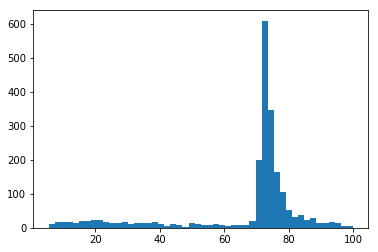

In [15]:
plt.hist(WQDataadf['WQI'], bins =50)
plt.show()

In [16]:
#plt.show()

In [18]:
WQData.shape

(2473, 9)